<a href="https://colab.research.google.com/github/Sdas190/ML-Projects/blob/main/Gold_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [2]:
# loading the csv data to a Pandas DataFrame
gld_price_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
gld_price_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print the last five rows of th dataframe
gld_price_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gld_price_data.shape


(2290, 6)

In [6]:
#getting some basic informations about the data
gld_price_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of the missing values
gld_price_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
# getting the statistical measures of the given data
gld_price_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Corellations:
1. positive Correlation
2. Negative Correlation

In [9]:


# Assuming gld_price_data is your DataFrame
# Convert the 'Date' column to datetime objects if it's not already
gld_price_data['Date'] = pd.to_datetime(gld_price_data['Date'])

# Now calculate the correlation, excluding the 'Date' column
correlation = gld_price_data.drop('Date', axis=1).corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

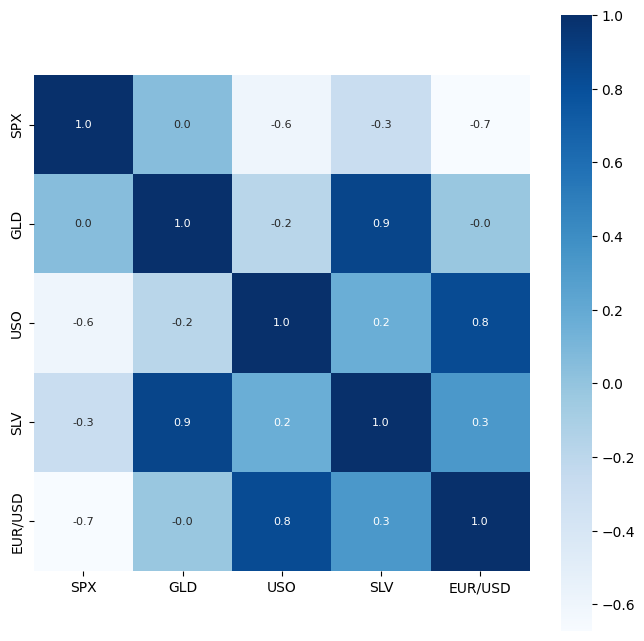

In [10]:
# constructing a heatmap to understand correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
#

In [11]:
 # correlation values
 print (correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [13]:
# checking the distribution of the GLD Price
 sns.distplot(gld_price_data['GLD'], color='green')


IndentationError: unexpected indent (<ipython-input-13-07dad0ab9497>, line 2)

In [14]:
X = gld_price_data.drop(['Date', 'GLD'], axis=1)
Y = gld_price_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print (Y)


0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into training data and test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


Model training:
Random Forest Regressor

In [18]:
regressor = RandomForestRegressor(n_estimators=100)


In [19]:
#training the model
regressor.fit(X_train, Y_train)



RandomForestRegressor()

Model Evaluation

In [20]:
test_data_prediction = regressor.predict(X_test)


In [21]:
print (test_data_prediction)

[168.71269962  81.97169988 115.96730005 127.60360041 120.84190135
 154.8647973  150.32849863 126.2338003  117.52999878 125.9617005
 116.81850097 171.44910064 141.5486992  167.97269875 115.23080011
 117.37160053 138.82710312 170.01540135 159.66520344 160.65179956
 155.20440044 125.4773001  175.21289959 157.27150302 125.07700029
  93.74409944  78.2199003  120.40179983 119.09049934 167.53820011
  88.2751004  125.41069976  91.22540067 117.64830016 121.23599927
 136.1846009  115.67660133 115.02810041 147.37850008 107.35320116
 104.44220232  87.16739769 126.46230034 117.86049954 154.31459916
 119.57720024 108.49589959 107.95559774  93.31350053 127.27119729
  74.88620023 113.6221989  121.85900005 111.05289913 118.86009899
 120.82999951 159.21339975 168.33170121 147.00539702  85.74429865
  94.52030028  86.68589884  90.52149988 118.96150089 126.41250036
 127.56340026 169.11470014 122.26209907 117.54169894  98.46840022
 167.60950167 143.26079915 132.53610215 121.26570247 120.49359972
 119.701300

In [22]:
# R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)



R squared error :  0.9893238260017682


Compare the actual values and predicted values in a plot

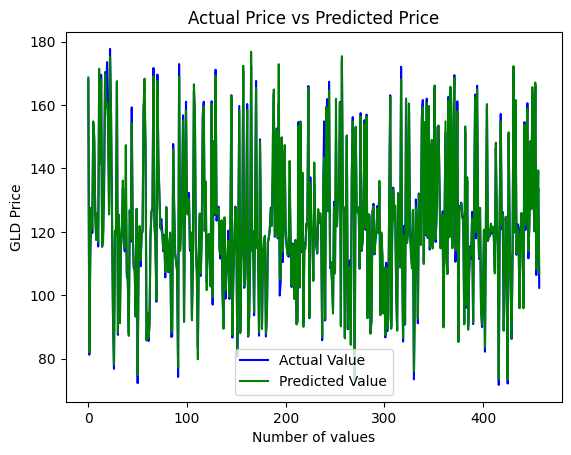

In [23]:
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [24]:
X_test = list(X_test ['SPX'])
Y_test = list(Y_test ['USO'])
plt.scatter(X_test, Y_test)
plt.xlabel('SPX')
plt.ylabel('USO')
plt.show()

TypeError: list indices must be integers or slices, not str